In [1]:
%load_ext autoreload
%load_ext autotime

time: 280 µs (started: 2024-03-25 01:14:59 -07:00)


In [2]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings('ignore')

time: 712 µs (started: 2024-03-25 01:14:59 -07:00)


In [3]:
trace_path = '/usr/workspace/iopp/wisio_logs/darshan_dlp_overhead_8_40/overhead.darshan'

time: 484 µs (started: 2024-03-25 01:14:59 -07:00)


In [4]:
%autoreload 2

from wisio.cluster_management import load_cluster_config
from wisio.darshan import DarshanAnalyzer

cluster_config = load_cluster_config('cluster_config_local.yml')
cluster_config.local_dir = '/var/tmp/wisio-darshan-dlp'

analyzer = DarshanAnalyzer(
    checkpoint=False,
    checkpoint_dir='/usr/workspace/iopp/wisio_logs/_checkpoints/darshan_dlp_overhead_1_40',
    cluster_config=cluster_config,
    working_dir='.wisio/darshan_dlp_overhead_8_40',
    debug=False,
)

analyzer.cluster_manager.client.dashboard_link

[INFO] [01:15:05] Initializing Darshan analyzer [/g/g91/izzet/projects/wisio/wisio/analyzer.py:110]


'http://127.0.0.1:33143/status'

time: 7.03 s (started: 2024-03-25 01:15:01 -07:00)


In [5]:
%autoreload 2

result = analyzer.analyze_dxt(
    trace_path_pattern=trace_path, 
    metrics=['iops'],
    # time_granularity=1e2,
    # view_types=['file_name'],
    # slope_threshold=80,
)

# result.output.console(compact=True)

[INFO] [01:15:29] Read traces (5.77235646196641) [/g/g91/izzet/projects/wisio/wisio/darshan.py:76]
[INFO] [01:15:30] Compute high-level metrics (1.3946882591117173) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:150]
[INFO] [01:15:32] Compute main view (1.4198881830088794) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:165]
[INFO] [01:15:32] Compute metric boundaries (0.07478589680977166) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:182]
[INFO] [01:15:36] Compute perspectives (4.404489560984075) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:203]
[INFO] [01:15:37] Detect I/O bottlenecks (1.0905548599548638) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:213]
[INFO] [01:15:46] Attach reasons to I/O bottlenecks (9.179364369018003) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:228]


time: 24.3 s (started: 2024-03-25 01:15:23 -07:00)


In [9]:
result.output.console(compact=True, max_bottlenecks=1, root_only=True, show_debug=True)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│                                                                                                                 │
│  Runtime          7.00 s                                                                                        │
│  I/O Time         0.32 s - R: 11.75% - W: 92.27% - M: 0.00%                                                     │
│  I/O Operations   320.3K ops - R: 99.90% - W: 0.10% - M: 0.00%                                                  │
│  I/O Size         39.18 GiB - R: 99.69% - W: 0.31%                                                              │
│  Read Requests    64 kiB-256 kiB                                                                                │
│  Write Requests   256 kiB-1 MiB                                                                                 │
│  Nodes            1 node                                                                                        │
│  Apps             1 app                                                                                         │
│  Processes/Ranks  320 processes                                                                                 │
│  Files            320 files - Shared: 0.31% - FPP: 99.69%                                                       │
│  Time Periods     139 time periods                                                                              │
│  Access Pattern   Sequential: 100.00% - Random: 0.00%                                                           │
│                                                                                                                 │
╰─ R: Read - W: Write - M: Metadata  ─────────────────────────────────────────────────────────────────────────────╯
                                                                                                                   
╭────────────────────────────────────── 55 I/O Bottlenecks with 219 Reasons ──────────────────────────────────────╮
│                                                                                                                 │
│  File View (8 bottlenecks with 31 reasons)                                                                      │
│  ├── [CR1] 320 processes access 1 file (file_0-320.bat) within 58 time periods across 1,320 I/O operations and  │
│  │   have an I/O time of 0.30 seconds which is 92.27% of overall I/O time of the workload.                      │
│  │   ├── [Operation imbalance] 'read' operations are 75.76% (1,000 operations) of total I/O operations.         │
│  │   ├── [Small writes] 'write' time is 100.00% (0.30 seconds) of I/O time.                                     │
│  │   └── [Small writes] Average 'write's are 96.97 kiB, which is smaller than 1.00 MiB.                         │
│  └── (7 more)                                                                                                   │
│  Process View (29 bottlenecks with 116 reasons)                                                                 │
│  ├── [HI9] 1 process (app#localhost#200#0) accesses 2 files within 58 time periods across 1,001 I/O operations  │
│  │   and has an I/O time of 0.32 seconds which is 100.00% of overall I/O time of the workload.                  │
│  │   ├── [Operation imbalance] 'read' operations are 99.90% (1,000 operations) of total I/O operations.         │
│  │   ├── [Size imbalance] 'read' size is 99.69% (125.00 MiB) of total I/O size.                                 │
│  │   ├── [Small writes] 'write' time is 92.27% (0.30 seconds) of I/O time.                                      │
│  │   └── [Small writes] Average 'write's are 409.1908091908092 B, which is smaller than 1.00 MiB.               │
│  └── (28 more)                                                                                                  │
│  Time Period View (18 bottlenecks with 72 reasons)    

time: 2.24 s (started: 2024-03-25 01:17:39 -07:00)


In [16]:
proc_view = result.view_results['iops'][('proc_name',)].view.compute()
proc_view

,time,count,size_min,size_max,size,read_time,write_time,metadata_time,read_size,write_size,...,open_time,seek_time,stat_time,close_count,open_count,seek_count,stat_count,time_per,count_per,iops_slope
proc_name,,,,,,,,,,,,,,,,,,,,,
app#localhost#0#0,0.116688,1001,131072,409600,131481600,0.037602,0.079087,0.0,131072000,409600,...,0.0,0.0,0.0,0,0,0,0,0.002259,0.003125,1.383172
app#localhost#1#0,0.101629,1001,131072,409600,131481600,0.023261,0.078368,0.0,131072000,409600,...,0.0,0.0,0.0,0,0,0,0,0.001968,0.003125,1.588132
app#localhost#10#0,0.135909,1001,131072,409600,131481600,0.028338,0.107570,0.0,131072000,409600,...,0.0,0.0,0.0,0,0,0,0,0.002631,0.003125,1.187563
app#localhost#100#0,0.101107,1001,131072,409600,131481600,0.022573,0.078534,0.0,131072000,409600,...,0.0,0.0,0.0,0,0,0,0,0.001958,0.003125,1.596325
app#localhost#101#0,0.130147,1001,131072,409600,131481600,0.023329,0.106818,0.0,131072000,409600,...,0.0,0.0,0.0,0,0,0,0,0.002520,0.003125,1.240134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
app#localhost#95#0,0.108590,1001,131072,409600,131481600,0.030373,0.078218,0.0,131072000,409600,...,0.0,0.0,0.0,0,0,0,0,0.002103,0.003125,1.486322
app#localhost#96#0,0.149023,1001,131072,409600,131481600,0.030522,0.118502,0.0,131072000,409600,...,0.0,0.0,0.0,0,0,0,0,0.002885,0.003125,1.083054
app#localhost#97#0,0.147554,1001,131072,409600,131481600,0.030879,0.116675,0.0,131072000,409600,...,0.0,0.0,0.0,0,0,0,0,0.002857,0.003125,1.093839


time: 115 ms (started: 2024-03-23 23:55:42 -07:00)


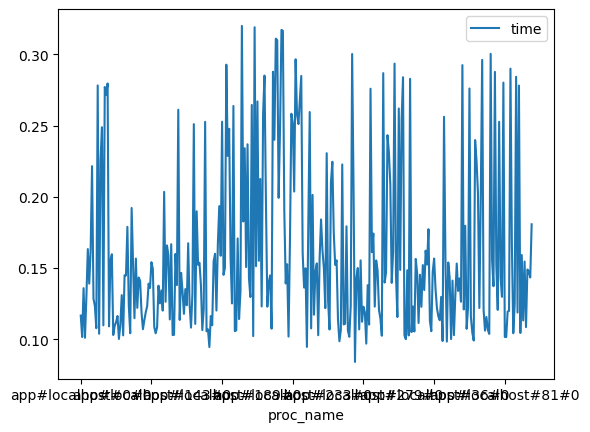

time: 130 ms (started: 2024-03-23 23:55:52 -07:00)


In [17]:
proc_view.reset_index().plot(x='proc_name', y='time')

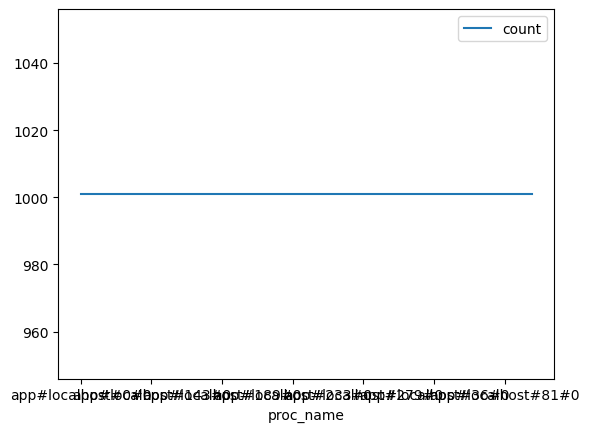

time: 112 ms (started: 2024-03-23 23:56:05 -07:00)


In [19]:
proc_view.reset_index().plot(x='proc_name', y='count')

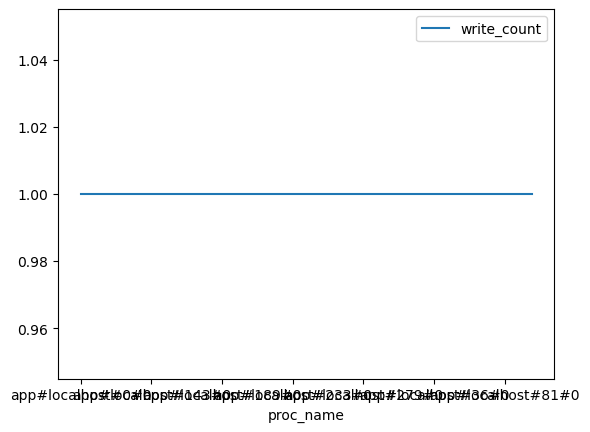

time: 111 ms (started: 2024-03-23 23:56:14 -07:00)


In [20]:
proc_view.reset_index().plot(x='proc_name', y='write_count')

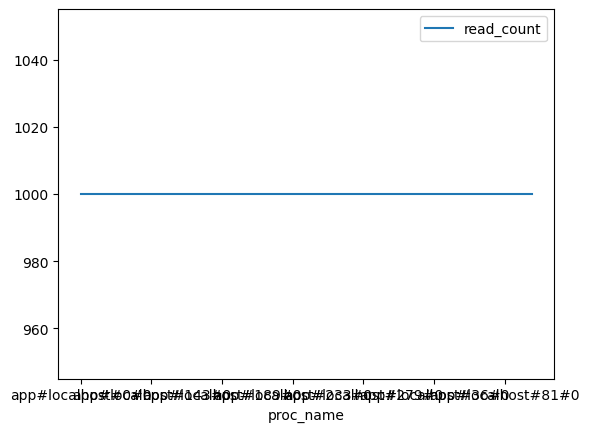

time: 112 ms (started: 2024-03-23 23:56:21 -07:00)


In [21]:
proc_view.reset_index().plot(x='proc_name', y='read_count')

In [8]:
time_view = result.view_results['iops'][('time_range',)].view.compute()
time_view

,time,count,size_min,size_max,size,read_time,write_time,metadata_time,read_size,write_size,...,open_time,seek_time,stat_time,close_count,open_count,seek_count,stat_count,time_per,count_per,iops_slope
time_range,,,,,,,,,,,,,,,,,,,,,
833,0.295221,320,409600,409600,131072000,0.000000,0.295221,0.0,0,131072000,...,0.0,0.0,0.0,0,0,0,0,0.865384,0.000999,0.001154
6318,0.000108,1,131072,131072,131072,0.000108,0.000000,0.0,131072,0,...,0.0,0.0,0.0,0,0,0,0,0.000317,0.000003,0.009861
6597,0.000437,3201,131072,131072,419561472,0.000437,0.000000,0.0,419561472,0,...,0.0,0.0,0.0,0,0,0,0,0.001282,0.009993,7.792263
6598,0.000473,3523,131072,131072,461766656,0.000473,0.000000,0.0,461766656,0,...,0.0,0.0,0.0,0,0,0,0,0.001387,0.010998,7.932041
6599,0.000459,3517,131072,131072,460980224,0.000459,0.000000,0.0,460980224,0,...,0.0,0.0,0.0,0,0,0,0,0.001345,0.010980,8.165472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6396,0.000070,1,131072,131072,131072,0.000070,0.000000,0.0,131072,0,...,0.0,0.0,0.0,0,0,0,0,0.000205,0.000003,0.015246
6319,0.000053,1,131072,131072,131072,0.000053,0.000000,0.0,131072,0,...,0.0,0.0,0.0,0,0,0,0,0.000156,0.000003,0.020031
6369,0.000066,1,131072,131072,131072,0.000066,0.000000,0.0,131072,0,...,0.0,0.0,0.0,0,0,0,0,0.000193,0.000003,0.016185


time: 211 ms (started: 2024-03-23 23:47:36 -07:00)


In [32]:
time_view['write_count'].value_counts()

write_count
0      138
320      1
Name: count, dtype: int64

time: 9.04 ms (started: 2024-03-24 00:03:54 -07:00)


In [31]:
time_view[['read_count', 'write_count', 'metadata_count']].reset_index().sort_values('time_range')

,time_range,read_count,write_count,metadata_count
0,833,0,320,0
1,6318,1,0,0
135,6319,1,0,0
110,6320,8,0,0
100,6321,15,0,0
...,...,...,...,...
53,6648,7043,0,0
54,6649,6080,0,0
55,6650,6080,0,0
56,6651,5120,0,0


time: 9.26 ms (started: 2024-03-24 00:01:45 -07:00)


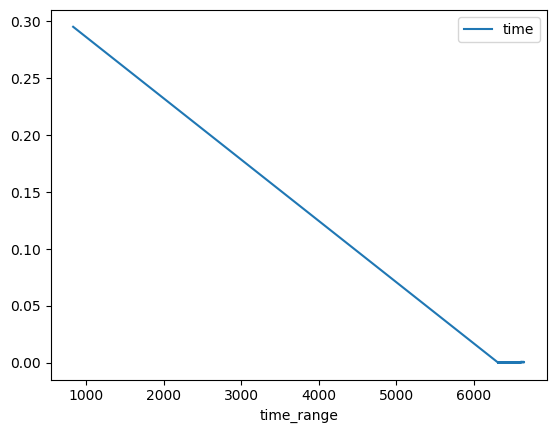

time: 120 ms (started: 2024-03-23 23:49:17 -07:00)


In [15]:
time_view.reset_index().plot(x='time_range', y='time')

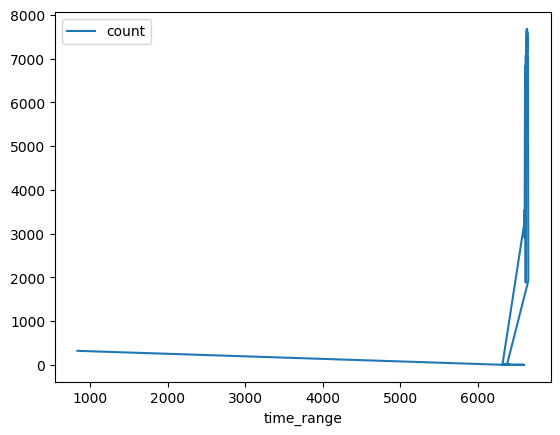

time: 125 ms (started: 2024-03-23 23:48:31 -07:00)


In [12]:
time_view.reset_index().plot(x='time_range', y='count')

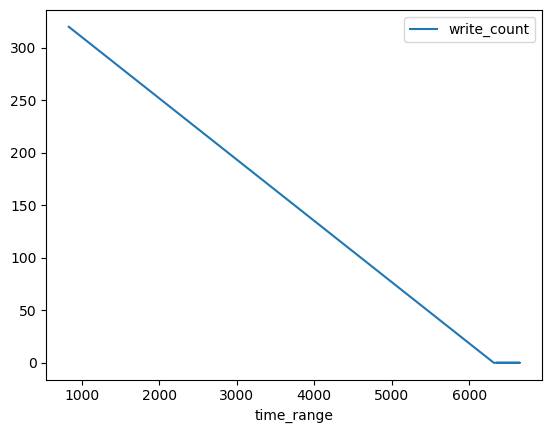

time: 122 ms (started: 2024-03-23 23:48:59 -07:00)


In [13]:
time_view.reset_index().plot(x='time_range', y='write_count')

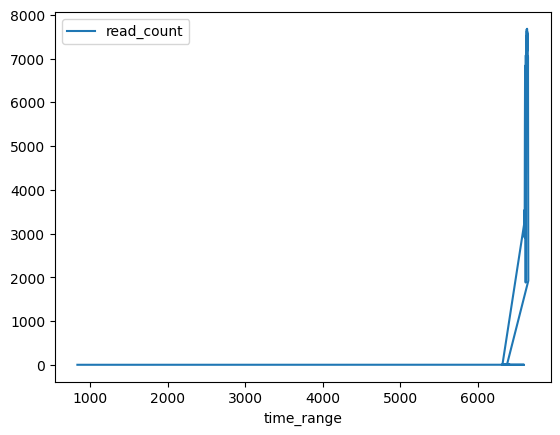

time: 124 ms (started: 2024-03-23 23:49:05 -07:00)


In [14]:
time_view.reset_index().plot(x='time_range', y='read_count')

In [8]:
result.output.console(compact=True, max_bottlenecks=2, root_only=True)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│                                                                                                                 │
│  Job Time         7.00 seconds                                                                                  │
│  I/O Time         0.32 s - R: 0.04 s (11.75%) - W: 0.30 s (92.27%) - M: 0.00 s (0.00%)                          │
│  I/O Operations   320.3K ops - R: 320K ops (99.90%) - W: 320 ops (0.10%) - M: 0 ops (0.00%)                     │
│  I/O Size         39.18 GiB - R: 39.06 GiB (99.69%) - W: 125.00 MiB (0.31%)                                     │
│  Read Requests    64 kiB-256 kiB - 320K ops                                                                     │
│  Write Requests   256 kiB-1 MiB - 320 ops                                                                       │
│  Nodes            1 node                                                                                        │
│  Apps             1 app                                                                                         │
│  Processes/Ranks  320 processes                                                                                 │
│  Files            320 files - Shared: 1 file (0.31%) - FPP: 319 files (99.69%)                                  │
│  Time Periods     139 time periods (Time Granularity: 1000.0)                                                   │
│  Access Pattern   Sequential: 320.3K ops (100.00%) - Random: 0 ops (0.00%)                                      │
│                                                                                                                 │
╰─ R: Read - W: Write - M: Metadata  ─────────────────────────────────────────────────────────────────────────────╯
                                                                                                                   
╭───────────────────────────────────── 364 I/O Bottlenecks with 1455 Reasons ─────────────────────────────────────╮
│                                                                                                                 │
│  File View (180 bottlenecks with 719 reasons)                                                                   │
│  ├── [CR1] 320 processes access 1 file (file_0-320.bat) within 58 time periods across 1320 I/O operations and   │
│  │   have an I/O time of 0.30 seconds which is 92.27% of overall I/O time of the workload.                      │
│  │   ├── [Operation imbalance] 'read' operations are 75.76% (1000 operations) of total I/O operations.          │
│  │   ├── [Small writes] 'write' time is 100.00% (0.30 seconds) of I/O time.                                     │
│  │   └── [Small writes] Average 'write's are 96.97 kiB, which is smaller than 1.00 MiB.                         │
│  ├── [LO2] 1 process accesses 1 file (file_34-320.bat) within 57 time periods across 1000 I/O operations and    │
│  │   has an I/O time of 0.03 seconds which is 10.00% of overall I/O time of the workload.                       │
│  │   ├── [Operation imbalance] 'read' operations are 100.00% (1000 operations) of total I/O operations.         │
│  │   ├── [Size imbalance] 'read' size is 100.00% (125.00 MiB) of total I/O size.                                │
│  │   ├── [Small reads] 'read' time is 100.00% (0.03 seconds) of I/O time.                                       │
│  │   └── [Small reads] Average 'read's are 128.00 kiB, which is smaller than 1.00 MiB.                          │
│  └── (178 more)                                                                                                 │
│  Process View (101 bottlenecks with 404 reasons)                                                                │
│  ├── [HI181] 1 process (app#localhost#200#0) accesses 2 files within 58 time periods across 1001 I/O            │
│  │   operations and has an I/O time of 0.32 seconds wh

time: 1.96 s (started: 2024-03-14 19:12:44 -07:00)


In [11]:
result.main_view.reset_index()['time_range'].describe().compute()

count    18559.000000
mean      6519.865079
std        754.325253
min        833.000000
25%       6609.000000
50%       6624.000000
75%       6638.000000
max       6652.000000
Name: time_range, dtype: float64

time: 178 ms (started: 2024-03-14 19:13:22 -07:00)


In [6]:
import dask.dataframe as dd

df = dd.read_parquet(result.bottleneck_dir).compute()
df

,subject,time,count,size_min,size_max,size,read_time,write_time,metadata_time,read_size,...,random_operations.reason.0,size_imbalance,size_imbalance.reason.0,size_imbalance.reason.1,small_reads,small_reads.reason.0,small_reads.reason.1,small_writes,small_writes.reason.0,small_writes.reason.1
0,/p/lustre1/haridev/dlio_profiler_data/file_0-3...,42.704803,1320,540672,540672,262144000,0.037602,42.667201,0.0,131072000,...,False,False,False,False,False,False,True,True,True,True


time: 87.4 ms (started: 2024-03-06 21:53:05 -08:00)


In [7]:
df.columns[df.columns.str.contains('reason')]

Index(['excessive_metadata_access.reason.0',
       'excessive_metadata_access.reason.1',
       'excessive_metadata_access.reason.2', 'operation_imbalance.reason.0',
       'operation_imbalance.reason.1', 'random_operations.reason.0',
       'size_imbalance.reason.0', 'size_imbalance.reason.1',
       'small_reads.reason.0', 'small_reads.reason.1', 'small_writes.reason.0',
       'small_writes.reason.1'],
      dtype='object')

time: 3.22 ms (started: 2024-03-06 21:53:28 -08:00)


In [19]:
view_bottlenecks = df[df['view_name'] == 'file_name']
reason_cols = view_bottlenecks.columns[view_bottlenecks.columns.str.contains('reason')]
reason_rules = [(col.split('.')[0], col) for col in reason_cols]
reason_count = sum(
    len(view_bottlenecks[(view_bottlenecks[rule] & view_bottlenecks[reason])])
    for rule, reason in reason_rules
)
reason_count

3

time: 11.1 ms (started: 2024-03-06 22:02:50 -08:00)


In [12]:
reason_rules = [(col.split('.')[0], col) for col in reason_cols]
reason_rules

[('excessive_metadata_access', 'excessive_metadata_access.reason.0'),
 ('excessive_metadata_access', 'excessive_metadata_access.reason.1'),
 ('excessive_metadata_access', 'excessive_metadata_access.reason.2'),
 ('operation_imbalance', 'operation_imbalance.reason.0'),
 ('operation_imbalance', 'operation_imbalance.reason.1'),
 ('random_operations', 'random_operations.reason.0'),
 ('size_imbalance', 'size_imbalance.reason.0'),
 ('size_imbalance', 'size_imbalance.reason.1'),
 ('small_reads', 'small_reads.reason.0'),
 ('small_reads', 'small_reads.reason.1'),
 ('small_writes', 'small_writes.reason.0'),
 ('small_writes', 'small_writes.reason.1')]

time: 4.22 ms (started: 2024-03-06 21:57:27 -08:00)


In [10]:
for col in reason_cols:
    print(col, len(view_bottlenecks[view_bottlenecks[col] == True]))

excessive_metadata_access.reason.0 0
excessive_metadata_access.reason.1 0
excessive_metadata_access.reason.2 0
operation_imbalance.reason.0 1
operation_imbalance.reason.1 0
random_operations.reason.0 0
size_imbalance.reason.0 0
size_imbalance.reason.1 0
small_reads.reason.0 0
small_reads.reason.1 1
small_writes.reason.0 1
small_writes.reason.1 1
time: 7.69 ms (started: 2024-03-06 21:54:48 -08:00)


In [11]:
from wisio.analysis import THRESHOLD_FUNCTIONS

THRESHOLD_FUNCTIONS['iops'](80)

5.671281819617707

time: 2.99 ms (started: 2024-02-08 16:48:52 -08:00)


In [13]:
proc_name_view_result = result.view_results['iops'][('proc_name',)].view.compute()
proc_name_view_result

,time,count,size_min,size_max,size,read_time,write_time,metadata_time,read_size,write_size,...,open_time,seek_time,stat_time,close_count,open_count,seek_count,stat_count,time_per,count_per,iops_slope
proc_name,,,,,,,,,,,,,,,,,,,,,
app#localhost#0#0,0.116688,1001,131072,409600,131481600,0.037602,0.079087,0.0,131072000,409600,...,0.0,0.0,0.0,0,0,0,0,0.002259,0.003125,0.722976
app#localhost#1#0,0.101629,1001,131072,409600,131481600,0.023261,0.078368,0.0,131072000,409600,...,0.0,0.0,0.0,0,0,0,0,0.001968,0.003125,0.629671
app#localhost#10#0,0.135909,1001,131072,409600,131481600,0.028338,0.107570,0.0,131072000,409600,...,0.0,0.0,0.0,0,0,0,0,0.002631,0.003125,0.842061
app#localhost#100#0,0.101107,1001,131072,409600,131481600,0.022573,0.078534,0.0,131072000,409600,...,0.0,0.0,0.0,0,0,0,0,0.001958,0.003125,0.626439
app#localhost#101#0,0.130147,1001,131072,409600,131481600,0.023329,0.106818,0.0,131072000,409600,...,0.0,0.0,0.0,0,0,0,0,0.002520,0.003125,0.806365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
app#localhost#95#0,0.108590,1001,131072,409600,131481600,0.030373,0.078218,0.0,131072000,409600,...,0.0,0.0,0.0,0,0,0,0,0.002103,0.003125,0.672802
app#localhost#96#0,0.149023,1001,131072,409600,131481600,0.030522,0.118502,0.0,131072000,409600,...,0.0,0.0,0.0,0,0,0,0,0.002885,0.003125,0.923315
app#localhost#97#0,0.147554,1001,131072,409600,131481600,0.030879,0.116675,0.0,131072000,409600,...,0.0,0.0,0.0,0,0,0,0,0.002857,0.003125,0.914211


time: 130 ms (started: 2024-02-08 16:49:46 -08:00)


In [16]:
file_name_view_result = result.view_results['iops'][('file_name',)].critical_view.compute()
file_name_view_result

,time,count,size_min,size_max,size,read_time,write_time,metadata_time,read_size,write_size,...,stat_time,close_count,open_count,seek_count,stat_count,time_per,count_per,iops_slope,iops_bin,iops_score
file_name,,,,,,,,,,,,,,,,,,,,,
/p/lustre1/haridev/dlio_profiler_data/file_0-320.bat,0.295221,1320,131072,409600,262144000,0.037602,0.295221,0.0,131072000,131072000,...,0.0,0,0,0,0,0.031956,0.004121,7.754536,8,critical


time: 28.6 ms (started: 2024-02-08 16:50:29 -08:00)


In [14]:
file_name_proc_name_view_result = result.view_results['iops'][('file_name', 'proc_name')].view.compute()
file_name_proc_name_view_result

,time,count,size_min,size_max,size,read_time,write_time,metadata_time,read_size,write_size,...,open_time,seek_time,stat_time,close_count,open_count,seek_count,stat_count,time_per,count_per,iops_slope
proc_name,,,,,,,,,,,,,,,,,,,,,
app#localhost#0#0,0.116688,1001,131072,409600,131481600,0.037602,0.079087,0.0,131072000,409600,...,0.0,0.0,0.0,0,0,0,0,0.002732,0.758333,0.003603
app#localhost#1#0,0.078368,1,409600,409600,409600,0.000000,0.078368,0.0,0,409600,...,0.0,0.0,0.0,0,0,0,0,0.001835,0.000758,2.422343
app#localhost#10#0,0.107570,1,409600,409600,409600,0.000000,0.107570,0.0,0,409600,...,0.0,0.0,0.0,0,0,0,0,0.002519,0.000758,3.324988
app#localhost#100#0,0.078534,1,409600,409600,409600,0.000000,0.078534,0.0,0,409600,...,0.0,0.0,0.0,0,0,0,0,0.001839,0.000758,2.427480
app#localhost#101#0,0.106818,1,409600,409600,409600,0.000000,0.106818,0.0,0,409600,...,0.0,0.0,0.0,0,0,0,0,0.002501,0.000758,3.301744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
app#localhost#95#0,0.078218,1,409600,409600,409600,0.000000,0.078218,0.0,0,409600,...,0.0,0.0,0.0,0,0,0,0,0.001832,0.000758,2.417701
app#localhost#96#0,0.118502,1,409600,409600,409600,0.000000,0.118502,0.0,0,409600,...,0.0,0.0,0.0,0,0,0,0,0.002775,0.000758,3.662871
app#localhost#97#0,0.116675,1,409600,409600,409600,0.000000,0.116675,0.0,0,409600,...,0.0,0.0,0.0,0,0,0,0,0.002732,0.000758,3.606399


time: 78.2 ms (started: 2024-02-08 16:49:54 -08:00)


In [5]:
%autoreload 2

result = analyzer.analyze_dxt(
    trace_path_pattern=trace_path, 
    # metrics=['time'],
    # time_granularity=1e2,
    view_types=['proc_name'],
)

result.output.console(show_debug=True)

[INFO] [23:13:17] Read traces (4.125968374311924) [/g/g91/izzet/projects/wisio/wisio/darshan.py:63]
[INFO] [23:13:19] Compute high-level metrics (1.502316564321518) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:127]
[INFO] [23:13:19] Compute main view (0.7662740824744105) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:142]
[INFO] [23:13:19] Compute metric boundaries (0.052195338532328606) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:155]
[INFO] [23:13:20] Compute perspectives (1.0001748595386744) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:186]
[INFO] [23:13:21] Detect I/O bottlenecks (1.0868694614619017) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:200]
/g/g91/izzet/projects/wisio/wisio/rules.py:541: RuntimeWarning: divide by zero encountered in log10
  complexity = np.log10(proc_names * time_ranges * files)
[INFO] [23:13:25] Attach reasons to I/O bottlenecks (3.274362726137042) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:210]


╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             7.00 seconds                                                                              │
│  I/O Time             0.32 seconds                                                                              │
│                       ├── Read - 0.04 seconds (11.75%)                                                          │
│                       ├── Write - 0.30 seconds (92.27%)                                                         │
│                       └── Metadata - 0.00 seconds (0.00%)                                                       │
│  I/O Ops              320,320 ops                                                                               │
│                       ├── Read - 320,000 ops (99.90%)                                                           │
│                       ├── Write - 320 ops (0.10%)                                                               │
│                       └── Metadata - 0 ops (0.00%)                                                              │
│  I/O Size             39.18 GiB                                                                                 │
│                       ├── Read - 39.06 GiB (99.69%)                                                             │
│                       └── Write - 125.00 MiB (0.31%)                                                            │
│  Read Xfer            256 KiB - 320 ops                                                                         │
│                       └── 64-256 KiB - 320 ops (100.00%)                                                        │
│  Write Xfer           1 MiB - 320 ops                                                                           │
│                       └── 256 KiB-1 MiB - 320 ops (100.00%)                                                     │
│  Node(s)              1 node(s)                                                                                 │
│                       └── localhost - 0.32 s (100.00%) - 39.06 GiB/125.00 MiB R/W (99.69/0.31%) - 320,320 ops   │
│                           (100.00%)                                                                             │
│  App(s)               1 app(s)                                                                                  │
│                       └── app - 0.32 s (100.00%) - 39.06 GiB/125.00 MiB R/W (99.69/0.31%) - 320,320 ops         │
│                           (100.00%)                                                                             │
│  Process(es)/Rank(s)  320 process(es)/rank(s)                                                                   │
│  Files                0 files                                                                                   │
│                       ├── Shared: N/A                                                                           │
│                       └── FPP: N/A                                                                              │
│  Time Period(s)       0 time period(s) (Time granularity: 1000.0)                                               │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
│  Complexity           -inf                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────── I/O Bottlenecks ────────────────────────────────────────────────╮
│  small_writes (157 bottlenecks)                                                                                 │
│  ├── proc_name->rank (54 bottlenecks)                                                                           │
│  │   ├── 1 rank (200) has an I/O time of 0.32 seconds 

time: 15.1 s (started: 2023-12-26 23:13:13 -08:00)


In [16]:
analyzer.cluster_manager.client.restart()

result = analyzer.analyze_dxt(
    trace_path_pattern=trace_path, 
    metrics=['iops'],
    # time_granularity=1e2,
    view_types=['proc_name', 'file_name'],
)

result.output.console(max_bottlenecks=10, show_debug=True)

[INFO] [19:05:02] Read traces (6.180273536127061) [/g/g91/izzet/projects/wisio/wisio/darshan.py:67]
[INFO] [19:05:03] Compute high-level metrics (0.03275363706052303) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:138]
[INFO] [19:05:04] Compute main view (0.15580259589478374) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:152]
[INFO] [19:05:04] Compute metric boundaries (0.03863329067826271) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:167]
[INFO] [19:05:05] Compute perspectives (0.37157522700726986) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:191]
[INFO] [19:05:06] Detect I/O bottlenecks (0.03299637883901596) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:204]
[INFO] [19:05:08] Attach reasons to I/O bottlenecks (2.3540058908984065) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:219]


╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             7.00 seconds                                                                              │
│  I/O Time             0.32 seconds                                                                              │
│                       ├── Read - 0.04 seconds (11.75%)                                                          │
│                       ├── Write - 0.30 seconds (92.27%)                                                         │
│                       └── Metadata - 0.00 seconds (0.00%)                                                       │
│  I/O Ops              320,320 ops                                                                               │
│                       ├── Read - 320,000 ops (99.90%)                                                           │
│                       ├── Write - 320 ops (0.10%)                                                               │
│                       └── Metadata - 0 ops (0.00%)                                                              │
│  I/O Size             39.18 GiB                                                                                 │
│                       ├── Read - 39.06 GiB (99.69%)                                                             │
│                       └── Write - 125.00 MiB (0.31%)                                                            │
│  Read Xfer            256 kiB - 320 ops                                                                         │
│                       └── 64-256 kiB - 320 ops (100.00%)                                                        │
│  Write Xfer           1 MiB - 320 ops                                                                           │
│                       └── 256 kiB-1 MiB - 320 ops (100.00%)                                                     │
│  Node(s)              1 node(s)                                                                                 │
│                       └── localhost - 0.32 s (100.00%) - 39.06 GiB/125.00 MiB R/W (99.69/0.31%) - 320,320 ops   │
│                           (100.00%)                                                                             │
│  App(s)               1 app(s)                                                                                  │
│                       └── app - 0.32 s (100.00%) - 39.06 GiB/125.00 MiB R/W (99.69/0.31%) - 320,320 ops         │
│                           (100.00%)                                                                             │
│  Process(es)/Rank(s)  320 process(es)/rank(s)                                                                   │
│  Files                320 files                                                                                 │
│                       ├── Shared: 1 files (0.31%)                                                               │
│                       └── FPP: 319 files (99.69%)                                                               │
│  Time Period(s)       0 time period(s) (Time granularity: 1000.0)                                               │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
│  Complexity           5.01                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────── I/O Bottlenecks ────────────────────────────────────────────────╮
│  File view (539 bottlenecks)                                                                                    │
│  ├── Operation imbalance (180 bottlenecks)                                                                      │
│  │   ├── [CR101] 1 file (/p/lustre1/haridev/dlio_profi

time: 17.2 s (started: 2024-02-05 19:04:53 -08:00)


In [6]:
analyzer.cluster_manager.client.restart()

result = analyzer.analyze_dxt(
    trace_path_pattern=trace_path, 
    metrics=['iops'],
    # time_granularity=1e2,
    view_types=['proc_name', 'file_name'],
)

result.output.console(max_bottlenecks_per_view_type=10, show_debug=True)

[INFO] [23:13:34] Read traces (4.173154636286199) [/g/g91/izzet/projects/wisio/wisio/darshan.py:63]
[INFO] [23:13:35] Compute high-level metrics (1.4587902445346117) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:127]
[INFO] [23:13:36] Compute main view (0.7673346726223826) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:142]
[INFO] [23:13:36] Compute metric boundaries (0.05127251148223877) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:155]
[INFO] [23:13:38] Compute perspectives (2.046650353819132) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:186]
[INFO] [23:13:40] Detect I/O bottlenecks (1.8989732302725315) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:200]
/g/g91/izzet/projects/wisio/wisio/rules.py:541: RuntimeWarning: divide by zero encountered in log10
  complexity = np.log10(proc_names * time_ranges * files)
[INFO] [23:13:46] Attach reasons to I/O bottlenecks (5.871636850759387) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:210]


╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             7.00 seconds                                                                              │
│  I/O Time             0.32 seconds                                                                              │
│                       ├── Read - 0.04 seconds (11.75%)                                                          │
│                       ├── Write - 0.30 seconds (92.27%)                                                         │
│                       └── Metadata - 0.00 seconds (0.00%)                                                       │
│  I/O Ops              320,320 ops                                                                               │
│                       ├── Read - 320,000 ops (99.90%)                                                           │
│                       ├── Write - 320 ops (0.10%)                                                               │
│                       └── Metadata - 0 ops (0.00%)                                                              │
│  I/O Size             39.18 GiB                                                                                 │
│                       ├── Read - 39.06 GiB (99.69%)                                                             │
│                       └── Write - 125.00 MiB (0.31%)                                                            │
│  Read Xfer            256 KiB - 320 ops                                                                         │
│                       └── 64-256 KiB - 320 ops (100.00%)                                                        │
│  Write Xfer           1 MiB - 320 ops                                                                           │
│                       └── 256 KiB-1 MiB - 320 ops (100.00%)                                                     │
│  Node(s)              1 node(s)                                                                                 │
│                       └── localhost - 0.32 s (100.00%) - 39.06 GiB/125.00 MiB R/W (99.69/0.31%) - 320,320 ops   │
│                           (100.00%)                                                                             │
│  App(s)               1 app(s)                                                                                  │
│                       └── app - 0.32 s (100.00%) - 39.06 GiB/125.00 MiB R/W (99.69/0.31%) - 320,320 ops         │
│                           (100.00%)                                                                             │
│  Process(es)/Rank(s)  320 process(es)/rank(s)                                                                   │
│  Files                320 files                                                                                 │
│                       ├── Shared: 1 files (0.31%)                                                               │
│                       └── FPP: 319 files (99.69%)                                                               │
│  Time Period(s)       0 time period(s) (Time granularity: 1000.0)                                               │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
│  Complexity           -inf                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────── I/O Bottlenecks ────────────────────────────────────────────────╮
│  small_writes (181 bottlenecks)                                                                                 │
│  ├── file_name->file_pattern (1 bottlenecks)                                                                    │
│  │   └── 1 file pattern (/p/lustre[0-9]/haridev/dlio_p

time: 24.9 s (started: 2023-12-26 23:13:28 -08:00)


In [7]:
analyzer.cluster_manager.client.restart()

result = analyzer.analyze_dxt(
    trace_path_pattern=trace_path, 
    metrics=['time'],
    # time_granularity=1e2,
    view_types=['proc_name', 'time_range'],
)

result.output.console(max_bottlenecks_per_view_type=10, show_debug=True)

[INFO] [23:13:59] Read traces (4.170035175047815) [/g/g91/izzet/projects/wisio/wisio/darshan.py:63]
[INFO] [23:14:01] Compute high-level metrics (1.5552512779831886) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:127]
[INFO] [23:14:01] Compute main view (0.8335807556286454) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:142]
[INFO] [23:14:02] Compute metric boundaries (0.06655554939061403) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:155]
[INFO] [23:14:03] Compute perspectives (1.577700050547719) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:186]
[INFO] [23:14:05] Detect I/O bottlenecks (2.2085881242528558) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:200]
/g/g91/izzet/projects/wisio/wisio/rules.py:541: RuntimeWarning: divide by zero encountered in log10
  complexity = np.log10(proc_names * time_ranges * files)
[INFO] [23:14:11] Attach reasons to I/O bottlenecks (5.940962725318968) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:210]


╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             7.00 seconds                                                                              │
│  I/O Time             0.32 seconds                                                                              │
│                       ├── Read - 0.04 seconds (11.75%)                                                          │
│                       ├── Write - 0.30 seconds (92.27%)                                                         │
│                       └── Metadata - 0.00 seconds (0.00%)                                                       │
│  I/O Ops              320,320 ops                                                                               │
│                       ├── Read - 320,000 ops (99.90%)                                                           │
│                       ├── Write - 320 ops (0.10%)                                                               │
│                       └── Metadata - 0 ops (0.00%)                                                              │
│  I/O Size             39.18 GiB                                                                                 │
│                       ├── Read - 39.06 GiB (99.69%)                                                             │
│                       └── Write - 125.00 MiB (0.31%)                                                            │
│  Read Xfer            256 KiB - 18,239 ops                                                                      │
│                       └── 64-256 KiB - 18,239 ops (100.00%)                                                     │
│  Write Xfer           1 MiB - 320 ops                                                                           │
│                       └── 256 KiB-1 MiB - 320 ops (100.00%)                                                     │
│  Node(s)              1 node(s)                                                                                 │
│                       └── localhost - 0.32 s (100.00%) - 39.06 GiB/125.00 MiB R/W (99.69/0.31%) - 320,320 ops   │
│                           (100.00%)                                                                             │
│  App(s)               1 app(s)                                                                                  │
│                       └── app - 0.32 s (100.00%) - 39.06 GiB/125.00 MiB R/W (99.69/0.31%) - 320,320 ops         │
│                           (100.00%)                                                                             │
│  Process(es)/Rank(s)  320 process(es)/rank(s)                                                                   │
│  Files                0 files                                                                                   │
│                       ├── Shared: N/A                                                                           │
│                       └── FPP: N/A                                                                              │
│  Time Period(s)       139 time period(s) (Time granularity: 1000.0)                                             │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
│  Complexity           -inf                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────── I/O Bottlenecks ────────────────────────────────────────────────╮
│  small_writes (237 bottlenecks)                                                                                 │
│  ├── proc_name->rank (54 bottlenecks)                                                                           │
│  │   ├── 1 rank (200) has an I/O time of 0.32 seconds 

time: 24.5 s (started: 2023-12-26 23:13:53 -08:00)


In [8]:
analyzer.cluster_manager.client.restart()

result = analyzer.analyze_dxt(
    trace_path_pattern=trace_path, 
    metrics=['time'],
    # time_granularity=1e2,
    view_types=['proc_name', 'time_range', 'file_name'],
)

result.output.console(max_bottlenecks_per_view_type=10, show_debug=True)

[INFO] [23:14:24] Read traces (4.277612691745162) [/g/g91/izzet/projects/wisio/wisio/darshan.py:63]
[INFO] [23:14:26] Compute high-level metrics (1.6396944848820567) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:127]
[INFO] [23:14:27] Compute main view (0.8663689699023962) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:142]
[INFO] [23:14:27] Compute metric boundaries (0.06790364347398281) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:155]
[INFO] [23:14:31] Compute perspectives (4.2947895070537925) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:186]
[INFO] [23:14:36] Detect I/O bottlenecks (4.542517729103565) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:200]
[INFO] [23:14:43] Attach reasons to I/O bottlenecks (7.6096955286338925) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:210]


ValueError: The columns in the computed data do not match the columns in the provided metadata
  Extra:   []
  Missing: ['att_perf']

time: 27.5 s (started: 2023-12-26 23:14:18 -08:00)


(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1554abf8e400>)

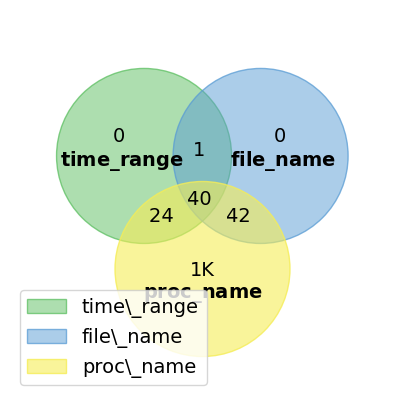

time: 344 ms (started: 2023-12-17 23:45:41 -08:00)


In [ ]:
result.plots.view_relations3(
    metric='time',
    view_key1=('time_range',),
    view_key2=('file_name',),
    view_key3=('proc_name',),
)

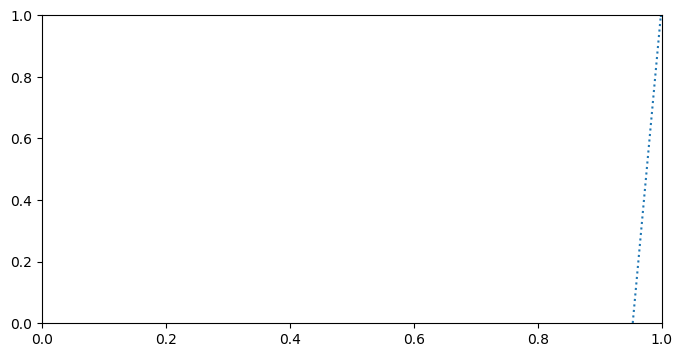

time: 226 ms (started: 2023-12-17 23:45:57 -08:00)


In [ ]:
fig, ax = result.plots.slope(
    figsize=(8, 4),
    metric='time',
    view_keys=[('time_range',)],
)